In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime 
from datetime import datetime
#from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"D:\AI\Beta\Uber Request Data.csv")
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [4]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
## droping usless features and some nan rows
df.drop('Request id',inplace=True,axis=1)
df = df[df['Driver id'].notna()]

In [ ]:
## this for plotting porposes
month_records = df['Request timestamp'].dt.month_name()
day_records = df['Request timestamp'].dt.day_name()

In [7]:
## for those who like to see data in numric forms :)
#df.groupby('Pickup point').count()
#df.groupby('Driver id').count()
#df.groupby('Status').count()

<AxesSubplot:xlabel='Driver id', ylabel='Count'>

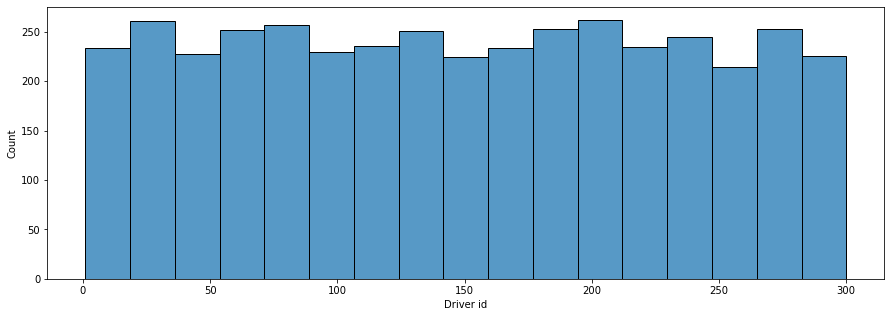

In [8]:
# data visualization
plt.figure(figsize=[15,5])
sns.histplot(x=df['Driver id'])

<AxesSubplot:xlabel='Status', ylabel='count'>

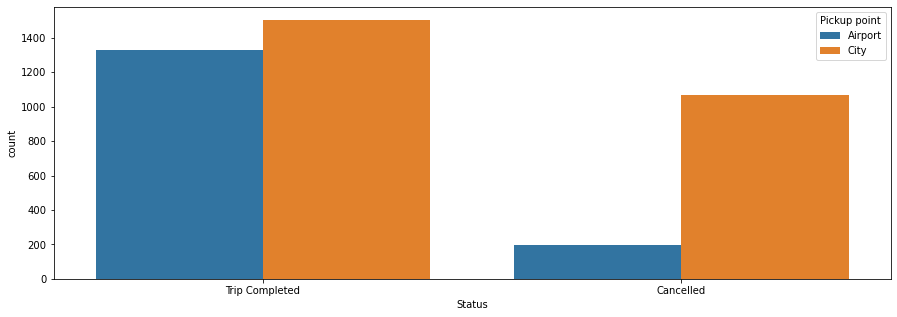

In [9]:
plt.figure(figsize=[15,5])
#plt.subplot(1,2,1)
#sns.countplot(x=df['Pickup point'])
#plt.subplot(1,2,2)
sns.countplot(x=df['Status'] ,hue=df['Pickup point'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Request timestamp', ylabel='count'>

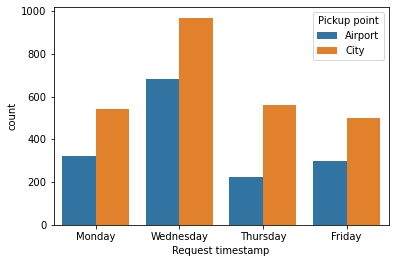

In [16]:
sns.countplot(day_records ,hue=df['Pickup point'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Request timestamp', ylabel='count'>

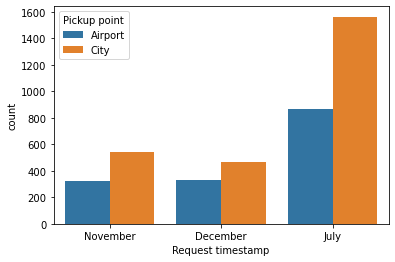

In [17]:
sns.countplot(month_records ,hue=df['Pickup point'])

In [18]:
## to make the datetime column has same formate 
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], infer_datetime_format=True);
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], infer_datetime_format=True);
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4095 entries, 0 to 4094
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Pickup point       4095 non-null   object        
 1   Driver id          4095 non-null   float64       
 2   Status             4095 non-null   object        
 3   Request timestamp  4095 non-null   datetime64[ns]
 4   Drop timestamp     2831 non-null   datetime64[ns]
 5   month              4095 non-null   int64         
 6   day                4095 non-null   int64         
 7   S_hour             4095 non-null   int64         
 8   S_minute           4095 non-null   int64         
 9   E_hour             2831 non-null   float64       
 10  E_minute           2831 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(4), object(2)
memory usage: 383.9+ KB


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13688\2145226266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], infer_datetime_format=True);
C:\Users\lenovo\AppData\Local\Temp\ipykernel_13688\2145226266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], infer_datetime_format=True);


In [19]:
df['month'] = df['Request timestamp'].dt.month
df['day'] = df['Request timestamp'].dt.day
df['S_hour'] = df['Request timestamp'].dt.hour
df['S_minute'] = df['Request timestamp'].dt.minute
df['E_hour'] = df['Drop timestamp'].dt.hour
df['E_minute'] = df['Drop timestamp'].dt.minute
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4095 entries, 0 to 4094
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Pickup point       4095 non-null   object        
 1   Driver id          4095 non-null   float64       
 2   Status             4095 non-null   object        
 3   Request timestamp  4095 non-null   datetime64[ns]
 4   Drop timestamp     2831 non-null   datetime64[ns]
 5   month              4095 non-null   int64         
 6   day                4095 non-null   int64         
 7   S_hour             4095 non-null   int64         
 8   S_minute           4095 non-null   int64         
 9   E_hour             2831 non-null   float64       
 10  E_minute           2831 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(4), object(2)
memory usage: 383.9+ KB


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13688\557501154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Request timestamp'].dt.month
C:\Users\lenovo\AppData\Local\Temp\ipykernel_13688\557501154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['Request timestamp'].dt.day
C:\Users\lenovo\AppData\Local\Temp\ipykernel_13688\557501154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [20]:
#df['year'] = df['Request timestamp'].dt.year
#df['week'] = df['Request timestamp'].dt.week
#df['day'] = df['Request timestamp'].dt.day
#df['week day'] = df['Request timestamp'].dt.weekday

In [21]:
## algorithm to find the time of the trip XD
df['trip_time']=0
for i in range(df.shape[0]):
    if df['S_hour'][i] == df['E_hour'][i]:
        df['trip_time'][i] = (df['E_minute'][i]-df['S_minute'][i])/60
    elif df['S_hour'][i] < df['E_hour'][i]:
        df['trip_time'][i] = (df['E_hour'][i]-df['S_hour'][i]-1) + (60-df['S_minute'][i]+df['E_minute'][i])/60
    else :
        df['trip_time'][i] = (24-df['S_hour'][i]+df['E_hour'][i]-1) + (60-df['S_minute'][i]+df['E_minute'][i])/60

## filling nan by zero as it represents trips has no time "canceled trips"
df['trip_time'] = df['trip_time'].fillna(0)

##there is no need for end time after calculating trip time & as end time has v.small corr
df.drop(['E_hour','E_minute'],axis=1,inplace=True)

#after getting all important info in datetime columns
df.drop(['Request timestamp','Drop timestamp'],axis=1,inplace=True);

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13688\2308683265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_time']=0
C:\Users\lenovo\AppData\Local\Temp\ipykernel_13688\2308683265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_time'][i] = (df['E_hour'][i]-df['S_hour'][i]-1) + (60-df['S_minute'][i]+df['E_minute'][i])/60
C:\Users\lenovo\AppData\Local\Temp\ipykernel_13688\2308683265.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [22]:
df=pd.get_dummies(df,columns=['Pickup point','Status'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4095 entries, 0 to 4094
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Driver id              4095 non-null   float64
 1   month                  4095 non-null   int64  
 2   day                    4095 non-null   int64  
 3   S_hour                 4095 non-null   int64  
 4   S_minute               4095 non-null   int64  
 5   trip_time              4095 non-null   float64
 6   Pickup point_Airport   4095 non-null   uint8  
 7   Pickup point_City      4095 non-null   uint8  
 8   Status_Cancelled       4095 non-null   uint8  
 9   Status_Trip Completed  4095 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 369.0 KB


In [23]:
df.head()

,Driver id,month,day,S_hour,S_minute,trip_time,Pickup point_Airport,Pickup point_City,Status_Cancelled,Status_Trip Completed
0,1.0,11,7,11,51,1.150000,1,0,0,1
1,1.0,11,7,17,57,0.833333,1,0,0,1
2,1.0,12,7,9,17,0.683333,0,1,0,1
3,1.0,12,7,21,8,0.916667,1,0,0,1
4,1.0,7,13,8,33,0.866667,0,1,0,1


In [29]:
df.corr()[['Status_Cancelled','Status_Trip Completed']]

,Status_Cancelled,Status_Trip Completed
Driver id,0.020394,-0.020394
month,-0.013140,0.013140
day,0.010268,-0.010268
S_hour,-0.257622,0.257622
S_minute,0.003446,-0.003446
trip_time,-0.903119,0.903119
Pickup point_Airport,-0.298213,0.298213
Pickup point_City,0.298213,-0.298213
Status_Cancelled,1.000000,-1.000000
Status_Trip Completed,-1.000000,1.000000


*it was clear that the most important features are : Start hour , trip_time , pickup point*